In [5]:
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint

In [ ]:
torch.__version__

'2.2.1+cpu'

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cpu')

In [45]:
import numpy as np
import pandas as pd

# Load the data
with open('pg.txt', 'r') as file:
    text = file.read()

words = text.split()




# Filter the list of words based on their length
words = [word for word in words if 2 < len(word) < 10]



# # Randomly shuffle the words
# words = words.sample(frac=1).reset_index(drop=True)
# words = words.tolist()

# Remove words having non alphabets
words = [word for word in words if word.isalpha()]
words[:10]


# Convert the text into a list of characters
chars = list(text)

# Convert to lowercase
chars = [char.lower() for char in chars]

# Filter out non-alphabet characters
chars = [char for char in chars if char.isalpha()]

# Randomly shuffle the characters
np.random.shuffle(chars)

# Build the vocabulary of characters and mappings to/from integers
# Assuming `text` is your data and `stoi` is your string-to-integer mapping
chars = sorted(list(set(text)))
stoi = {c: i for i, c in enumerate(chars)}
itos = {i: c for c, i in stoi.items()}
print(itos)


{0: '\n', 1: ' ', 2: '"', 3: '$', 4: '%', 5: "'", 6: '(', 7: ',', 8: '-', 9: '.', 10: '0', 11: '1', 12: '2', 13: '3', 14: '4', 15: '5', 16: '6', 17: '8', 18: '9', 19: ':', 20: ';', 21: '?', 22: 'A', 23: 'B', 24: 'C', 25: 'D', 26: 'E', 27: 'F', 28: 'G', 29: 'H', 30: 'I', 31: 'K', 32: 'L', 33: 'M', 34: 'N', 35: 'O', 36: 'P', 37: 'R', 38: 'S', 39: 'T', 40: 'U', 41: 'V', 42: 'W', 43: 'Y', 44: '[', 45: ']', 46: '_', 47: 'a', 48: 'b', 49: 'c', 50: 'd', 51: 'e', 52: 'f', 53: 'g', 54: 'h', 55: 'i', 56: 'j', 57: 'k', 58: 'l', 59: 'm', 60: 'n', 61: 'o', 62: 'p', 63: 'q', 64: 'r', 65: 's', 66: 't', 67: 'u', 68: 'v', 69: 'w', 70: 'x', 71: 'y', 72: 'z', 73: '—'}


In [46]:
block_size = 5 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:]:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

# Move data to GPU

X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

Streaming output truncated to the last 5000 lines.


r ---> e



re ---> s


res ---> t

rest ---> .





 ---> t




t ---> h



th ---> a


tha ---> t

that ---> .





 ---> g




g ---> r



gr ---> a


gra ---> s

gras ---> p
grasp ---> e
raspe ---> d
asped ---> .





 ---> p




p ---> r



pr ---> o


pro ---> b

prob ---> l
probl ---> e
roble ---> m
oblem ---> s
blems ---> .





 ---> w




w ---> h



wh ---> e


whe ---> r

wher ---> e
where ---> .





 ---> y




y ---> o



yo ---> u


you ---> .





 ---> s




s ---> h



sh ---> o


sho ---> u

shou ---> l
shoul ---> d
hould ---> .





 ---> W




W ---> h



Wh ---> y


Why ---> .





 ---> p




p ---> e



pe ---> o


peo ---> p

peop ---> l
peopl ---> e
eople ---> .





 ---> c




c ---> o



co ---> u


cou ---> l

coul ---> d
could ---> .





 ---> h




h ---> a



ha ---> r


har ---> d

hard ---> .





 ---> m




m ---> a



ma ---> k


mak ---> e

make ---> .





 ---> y




y ---> o



yo ---> u




In [47]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32427, 5]), torch.int64, torch.Size([32427]), torch.int64)

In [48]:
# Embedding layer for the context

emb_dim = 4
emb = torch.nn.Embedding(len(stoi), emb_dim)

In [49]:
emb.weight

Parameter containing:
tensor([[ 2.5529e-01,  1.2355e+00, -1.7766e+00,  2.3308e-01],
        [-1.4972e-01,  1.6762e+00, -4.3908e-01,  1.1226e+00],
        [ 1.9520e-01,  6.4929e-01,  7.9757e-01, -4.7523e-01],
        [ 6.7854e-01,  4.4421e-01,  8.6023e-01,  9.9651e-01],
        [ 1.1572e-01,  1.5896e+00,  1.1245e+00,  5.6707e-01],
        [-9.6500e-01, -1.0179e+00,  5.6118e-01,  6.5787e-01],
        [ 1.3929e+00, -2.6023e-01,  1.2572e-01, -5.9832e-01],
        [-1.6102e+00,  1.1611e+00, -1.2624e-01, -1.9625e-01],
        [ 6.0210e-01,  1.7557e-02, -7.4426e-01,  1.3942e+00],
        [ 2.3158e+00, -3.6537e-01,  3.4357e-01,  5.6193e-01],
        [-9.6304e-01, -4.9537e-01,  8.0203e-01,  2.9086e-02],
        [ 2.7809e-01,  4.4667e-01,  9.5791e-01,  1.2293e+00],
        [-1.7102e+00, -3.7185e-01,  6.1627e-01,  5.6555e-01],
        [ 9.2298e-02,  1.5689e-01, -5.9214e-01, -1.1136e+00],
        [ 4.8754e-02, -1.3236e+00,  3.5269e-01,  8.8875e-02],
        [-3.6502e-01,  1.0460e+00, -3.8612e-01, 

In [50]:
emb.weight.shape

torch.Size([74, 4])

<Axes: >

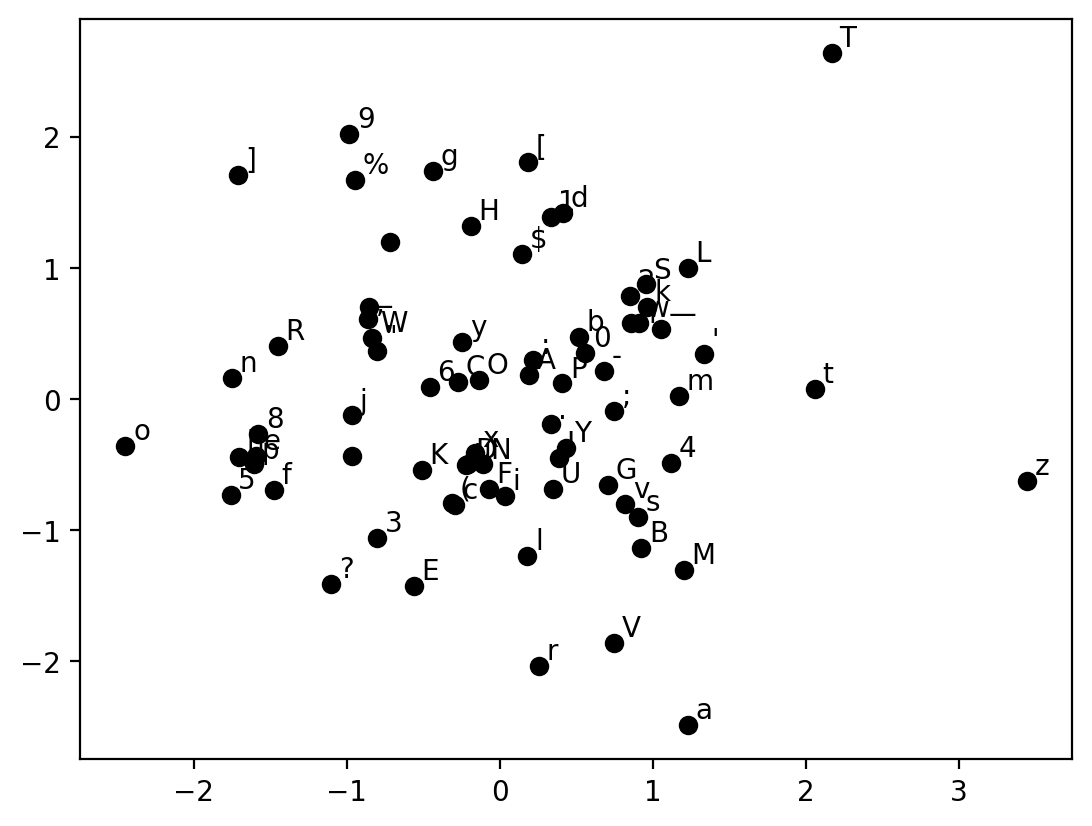

In [51]:
from sklearn.decomposition import PCA

def plot_emb(emb, itos, ax=None):
    # Get the weights of the embedding layer
    weights = emb.weight.detach().cpu().numpy()

    # Use PCA to reduce the dimensionality to 2
    pca = PCA(n_components=2)
    weights_pca = pca.fit_transform(weights)

    if ax is None:
        fig, ax = plt.subplots()

    for i in range(len(itos)):
        x, y = weights_pca[i]
        ax.scatter(x, y, color='k')
        ax.text(x + 0.05, y + 0.05, itos[i])

    return ax

plot_emb(emb, itos)

In [52]:
class NextChar(nn.Module):
  def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
    super().__init__()
    self.emb = nn.Embedding(vocab_size, emb_dim)
    self.lin1 = nn.Linear(block_size * emb_dim, hidden_size)
    self.lin2 = nn.Linear(hidden_size, vocab_size)

  def forward(self, x):
    x = self.emb(x)
    x = x.view(x.shape[0], -1)
    x = torch.sin(self.lin1(x))
    x = self.lin2(x)
    return x


In [53]:
# Generate names from untrained model


model = NextChar(block_size, len(stoi), emb_dim, 10).to(device)
model = torch.compile(model)

g = torch.Generator()
g.manual_seed(4000002)
def generate_name(model, itos, stoi, block_size, max_len=10):
    context = [0] * block_size
    name = ''
    for i in range(max_len):
        x = torch.tensor(context).view(1, -1).to(device)
        y_pred = model(x)
        ix = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()
        ch = itos[ix]
        if ch == '.':
            break
        name += ch
        context = context[1:] + [ix]
    return name

for i in range(10):
    print(generate_name(model, itos, stoi, block_size))



o8awdDvh2z
?WU6g['FbU
wFmN(9m69E
4rAt]HN
co"_jF-%vM
ce;RdU?UUH
W85obG-j5j
qtvo%[t6_i
fP]$e93qc3
—Clsbt"Gxg


In [54]:
for param_name, param in model.named_parameters():
    print(param_name, param.shape)

_orig_mod.emb.weight torch.Size([74, 4])
_orig_mod.lin1.weight torch.Size([10, 20])
_orig_mod.lin1.bias torch.Size([10])
_orig_mod.lin2.weight torch.Size([74, 10])
_orig_mod.lin2.bias torch.Size([74])


In [56]:
# Train the model

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.01)
import time
# Mini-batch training
batch_size = 4096
print_every = 100
elapsed_time = []
for epoch in range(1000):
    start_time = time.time()
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i+batch_size]
        y = Y[i:i+batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    end_time = time.time()
    elapsed_time.append(end_time - start_time)
    if epoch % print_every == 0:
        print(epoch, loss.item())

0 1.7856520414352417
100 1.7754333019256592
200 1.774740219116211
300 1.7763961553573608
400 1.7756506204605103
500 1.7755869626998901
600 1.7754874229431152
700 1.7753657102584839
800 1.7752900123596191
900 1.7752214670181274


<Axes: >

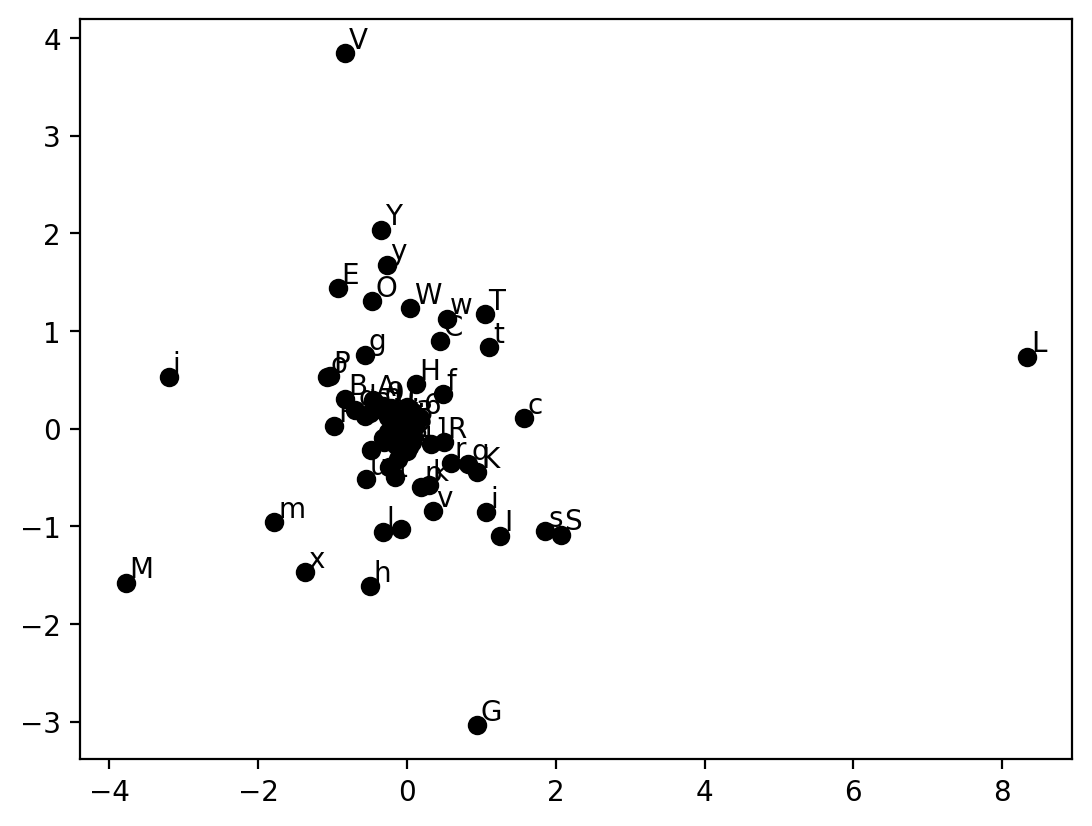

In [57]:
# Visualize the embedding

plot_emb(model.emb, itos)

In [58]:
# Generate names from trained model

for i in range(10):
    print(generate_name(model, itos, stoi, block_size))

agfrig
that
yirsh
biging
there
that
rents
who
pime
coo
